In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
%matplotlib inline

In [5]:
#from sklearn.datasets import fetch_california_housing

In [6]:
#housing = fetch_california_housing()

In [7]:
#housing.feature_names

In [8]:
housing = pd.read_csv('dataset/housing.csv')

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

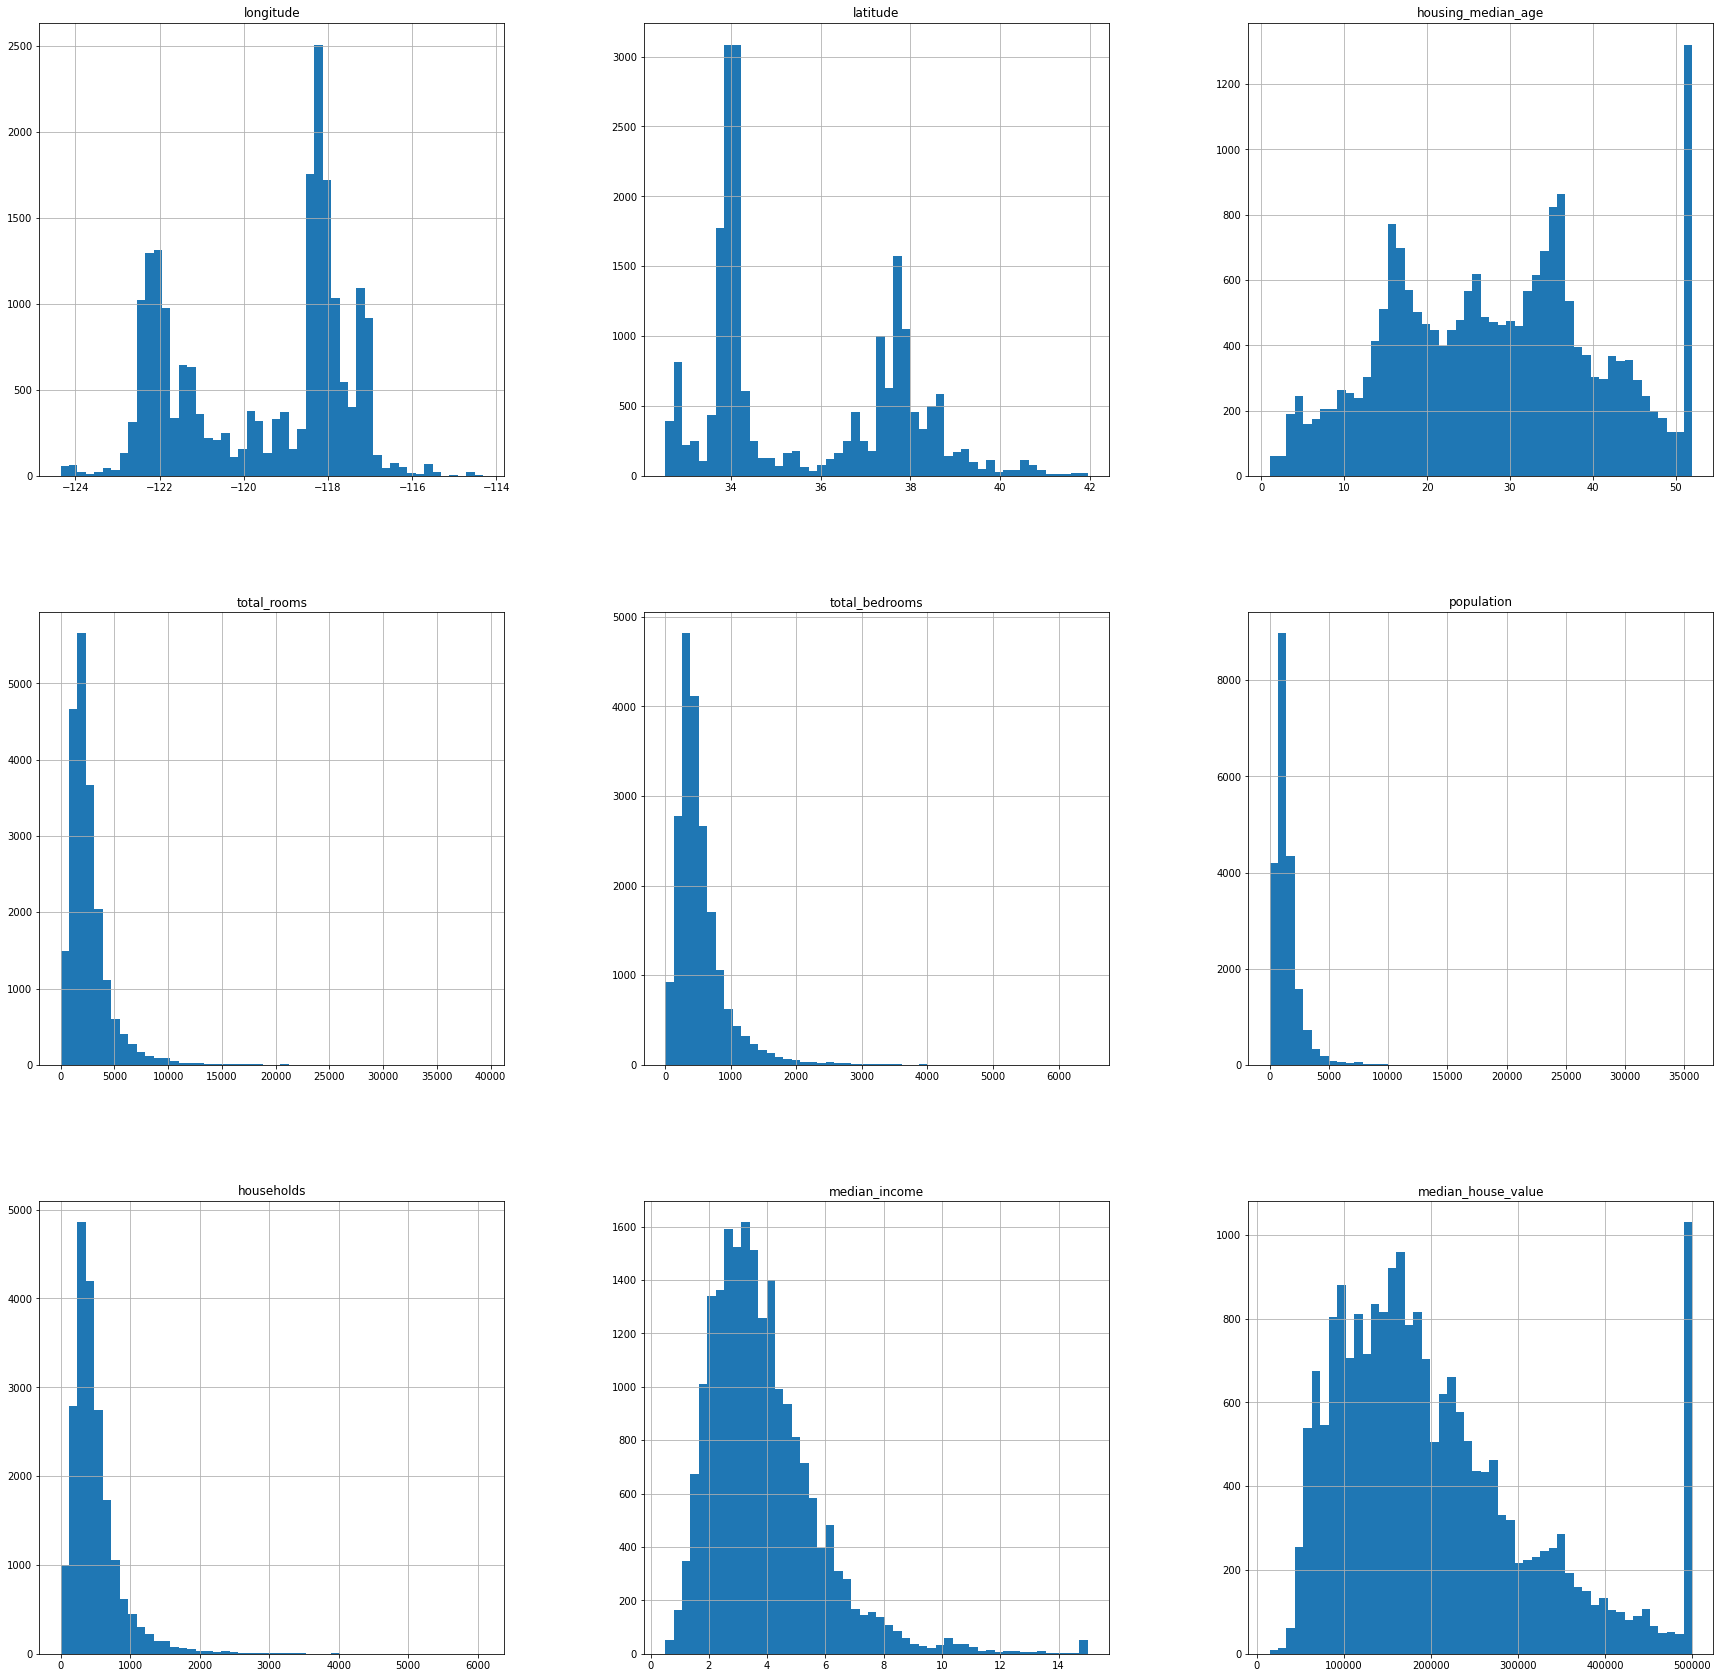

In [9]:
housing.hist(figsize=(30,30),bins=50)

Text(0.5, 1.0, 'Number of houses on ocean proximity categories')

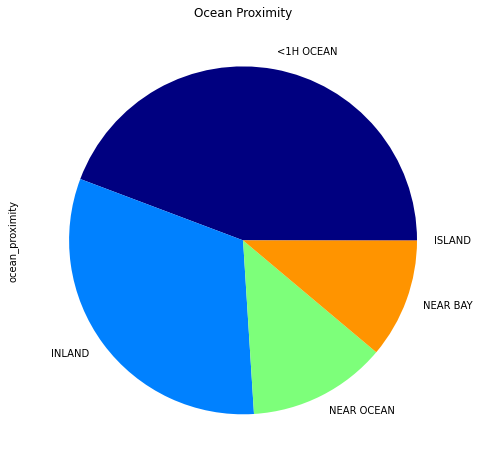

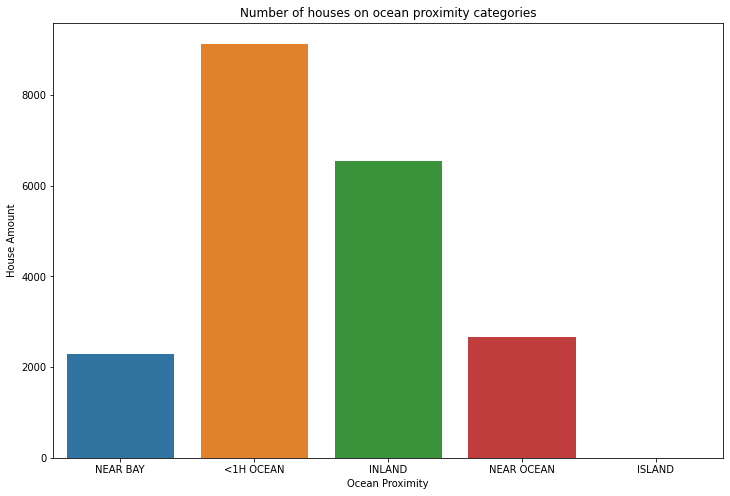

In [10]:
plt.figure(figsize=(8,8))
plt.title("Ocean Proximity")
housing['ocean_proximity'].value_counts().plot(kind = 'pie',colormap = 'jet')


# amount on ocean_proximity categories
# X axis： house amount
# Y axis: ocean proximity
plt.figure(figsize=(12, 8))
sns.countplot(data=housing, x="ocean_proximity")
plt.xlabel("Ocean Proximity")
plt.ylabel("House Amount")
plt.title("Number of houses on ocean proximity categories")

Text(0.5, 1.0, 'Density of Median House Value on Ocean Proximity')

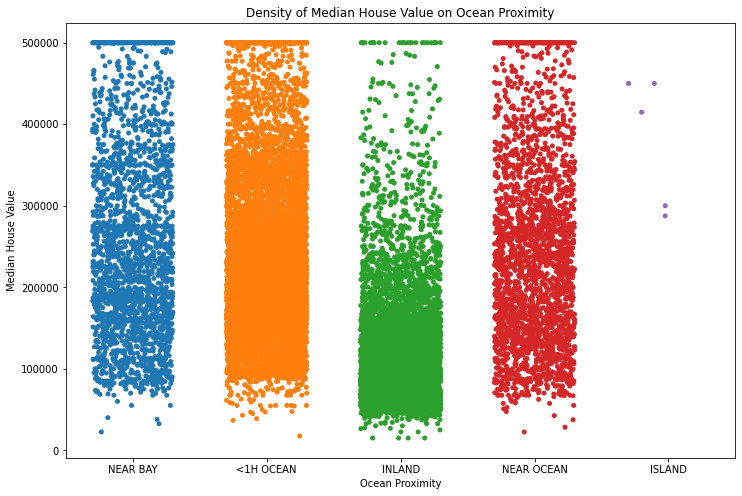

In [11]:
# Density of Median House Value on Ocean Proximity
plt.figure(figsize=(12, 8))
sns.stripplot(data=housing, x="ocean_proximity", y="median_house_value",
              jitter=0.3)
plt.xlabel("Ocean Proximity")
plt.ylabel("Median House Value")
plt.title("Density of Median House Value on Ocean Proximity")

Text(0.5, 1.0, 'House value on Ocean Proximity Categories')

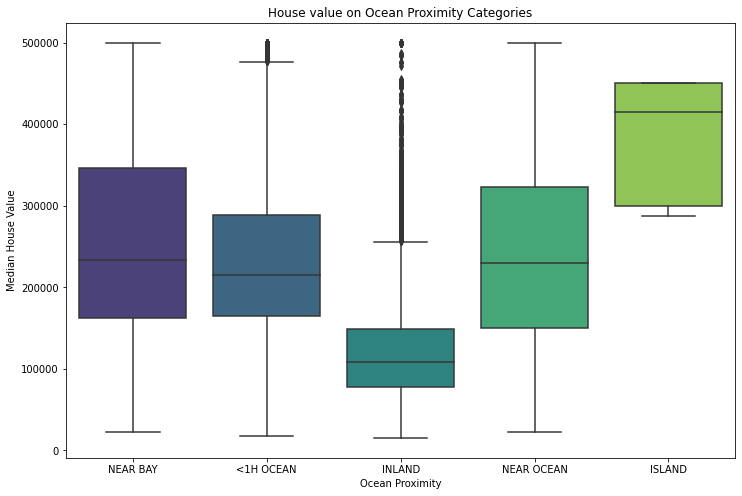

In [12]:
# house value on ocean_proximity categories
# X axis: Ocean Proximity
# Y axis: Median House Value
plt.figure(figsize=(12, 8))
sns.boxplot(data=housing, x="ocean_proximity", y="median_house_value",
            palette="viridis")
plt.xlabel("Ocean Proximity")
plt.ylabel("Median House Value")
plt.title("House value on Ocean Proximity Categories")

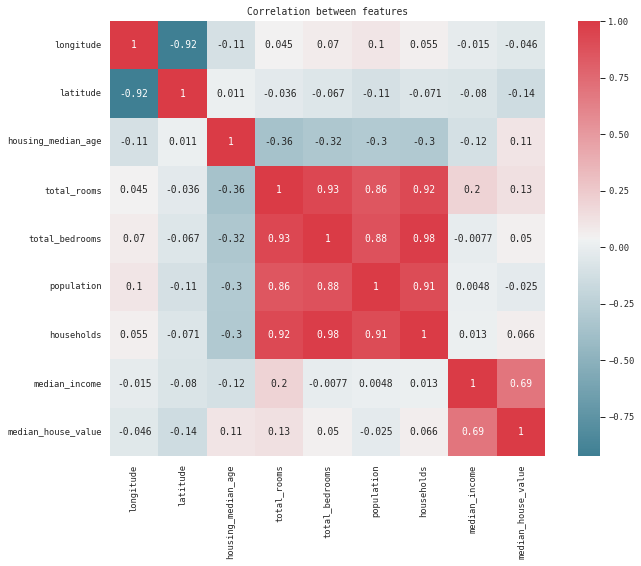

In [13]:
#heatmap using seaborn
#set the context for plotting 
sns.set(context="paper",font="monospace")
housing_corr_matrix = housing.corr()
#set the matplotlib figure
fig, axe = plt.subplots(figsize=(12,8))
#Generate color palettes 
cmap = sns.diverging_palette(220,10,center = "light", as_cmap=True)
#draw the heatmap
plt.title("Correlation between features")
sns.heatmap(housing_corr_matrix,vmax=1,square =True, cmap=cmap,annot=True );

# print('\nAs shown in the Heatmap there is a strong correlation between the following features:\n')
# print('- households')
# print('- total_bedrooms')
# print('- total_rooms')
# print('- population')

# print('\n')

# print('The number of bedrooms in a district is obviously correlated\nwith the number of rooms in the district, 
#       the same is true for the number of families\nand the total population living in a district, 
#       finally number  of rooms is correlated\nwith the people\n')

/opt/anaconda3/envs/tenserflow-for-beginners/lib/python3.10/site-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 85.99999999999991, 'latitude')

<Figure size 1080x720 with 0 Axes>

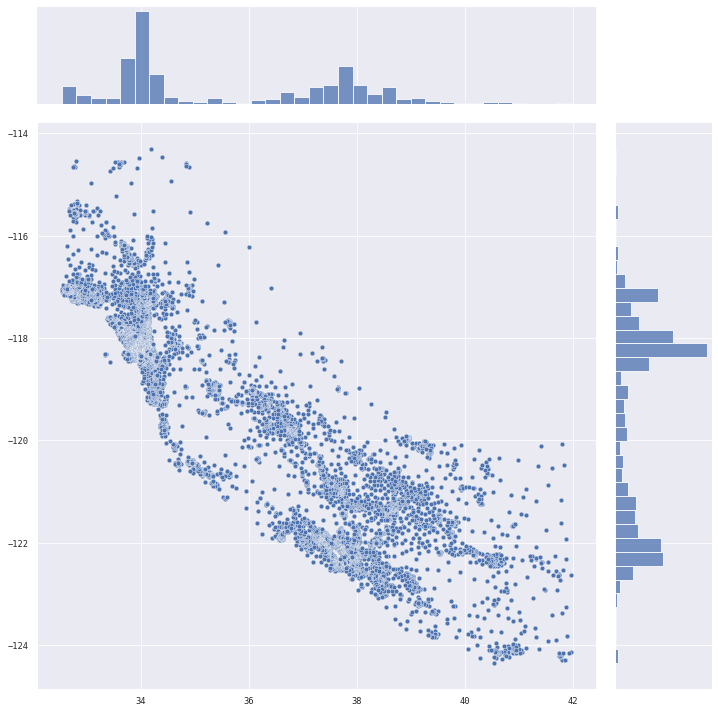

In [14]:
# Join Geographical Chart and histogram to show population density
plt.figure(figsize=(15,10))
sns.jointplot(x=housing.latitude.values,y=housing.longitude.values,size=10)
plt.ylabel("longitude")
plt.xlabel("latitude")

Text(0.5, 1.0, 'Geographical chart Shows Median House Value')

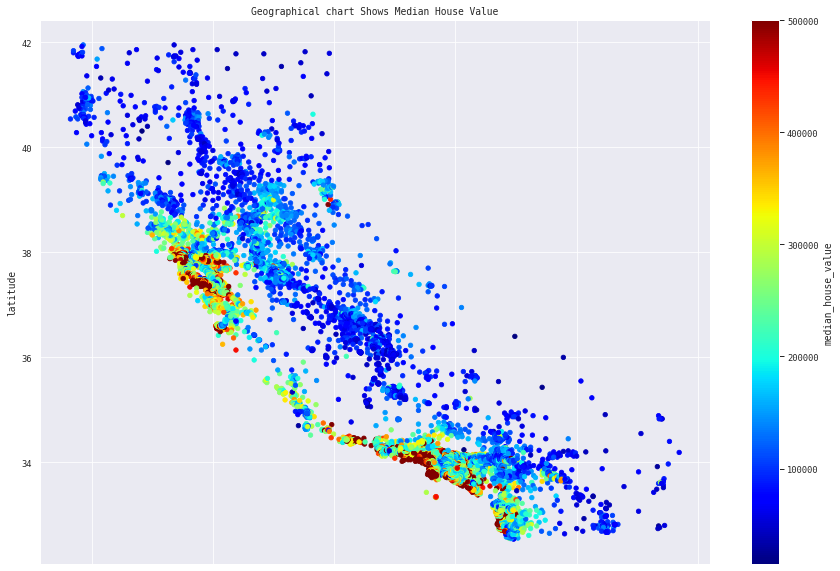

In [15]:
# Geographical Chart shows median house value
housing.plot(kind="scatter", x='longitude', y='latitude', figsize=(15, 10),
           c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True, )
plt.title("Geographical chart Shows Median House Value")

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
train_set, test_set =train_test_split(housing, test_size=0.2)

In [18]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17439,-120.45,34.63,32.0,1840.0,309.0,828.0,333.0,4.5486,172400.0,NEAR OCEAN
10300,-117.83,33.93,14.0,1956.0,282.0,671.0,269.0,6.5841,306400.0,<1H OCEAN
5841,-118.32,34.19,37.0,1519.0,331.0,613.0,315.0,3.0179,272500.0,<1H OCEAN
9998,-121.04,39.08,8.0,2870.0,526.0,1307.0,451.0,3.4630,201700.0,INLAND
10286,-117.83,33.89,25.0,1737.0,270.0,840.0,265.0,4.6250,245700.0,<1H OCEAN


In [19]:
train_set.size

165120

In [20]:
test_set.size

41280

<AxesSubplot:>

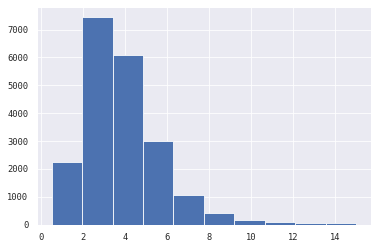

In [21]:
housing['median_income'].hist()

In [22]:
housing['income_cat']=np.ceil(housing['median_income']/1.5)

<AxesSubplot:>

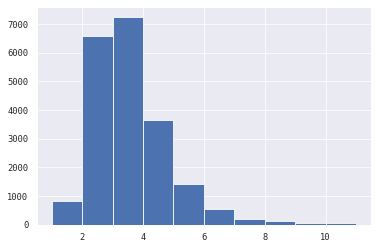

In [23]:
housing['income_cat'].hist()

In [24]:
housing['income_cat'].value_counts()

3.0     7236
2.0     6581
4.0     3639
5.0     1423
1.0      822
6.0      532
7.0      189
8.0      105
9.0       50
11.0      49
10.0      14
Name: income_cat, dtype: int64

In [25]:
housing['income_cat'].where(housing['income_cat']<5,5.0, inplace=True)

<AxesSubplot:>

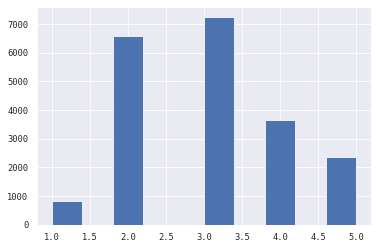

In [26]:
housing['income_cat'].hist()

In [27]:
from sklearn.model_selection import StratifiedShuffleSplit

In [28]:
split = StratifiedShuffleSplit(n_splits=1, test_size = 0.2)

In [29]:
for train_index, test_index in split.split(housing,housing['income_cat']):
    s_train_set = housing.loc[train_index]
    s_test_set = housing.loc[test_index]

<AxesSubplot:>

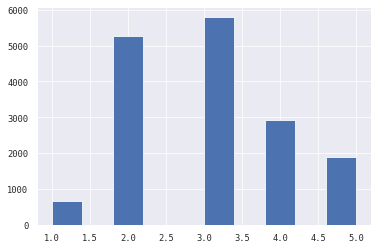

In [30]:
s_train_set['income_cat'].hist()

In [31]:
housing = s_train_set.copy()

In [32]:
housing.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat
longitude,1.000000,-0.924451,-0.104047,0.045719,0.071523,0.099597,0.056554,-0.015820,-0.044706,-0.011754
latitude,-0.924451,1.000000,0.005587,-0.037797,-0.069103,-0.108876,-0.072878,-0.079707,-0.146052,-0.084844
housing_median_age,-0.104047,0.005587,1.000000,-0.354174,-0.314058,-0.288942,-0.296451,-0.119257,0.105610,-0.144408
total_rooms,0.045719,-0.037797,-0.354174,1.000000,0.931016,0.856754,0.919183,0.194366,0.133167,0.214671
total_bedrooms,0.071523,-0.069103,-0.314058,0.931016,1.000000,0.875252,0.979594,-0.009386,0.051196,0.012374
population,0.099597,-0.108876,-0.288942,0.856754,0.875252,1.000000,0.905394,0.001786,-0.025401,0.021154
households,0.056554,-0.072878,-0.296451,0.919183,0.979594,0.905394,1.000000,0.010606,0.066730,0.034389
median_income,-0.015820,-0.079707,-0.119257,0.194366,-0.009386,0.001786,0.010606,1.000000,0.687283,0.903289
median_house_value,-0.044706,-0.146052,0.105610,0.133167,0.051196,-0.025401,0.066730,0.687283,1.000000,0.644014
income_cat,-0.011754,-0.084844,-0.144408,0.214671,0.012374,0.021154,0.034389,0.903289,0.644014,1.000000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

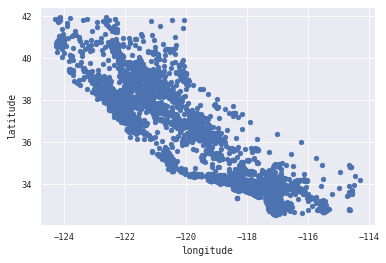

In [33]:
housing.plot(kind ='scatter', x = 'longitude', y='latitude')

In [34]:
housing = s_train_set.copy()

In [35]:
housing.drop('median_house_value', axis= 1, inplace= True)

In [36]:
housing.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
10160,-117.96,33.90,10.0,2423.0,356.0,1213.0,347.0,6.5635,<1H OCEAN,5.0
14701,-117.07,32.80,36.0,2028.0,349.0,820.0,352.0,3.9828,<1H OCEAN,3.0
19393,-120.85,37.78,30.0,1120.0,248.0,609.0,237.0,2.2386,INLAND,2.0
13375,-117.55,34.14,3.0,5710.0,919.0,2874.0,886.0,5.3638,INLAND,4.0
11348,-117.91,33.77,26.0,5556.0,1398.0,4545.0,1333.0,3.0902,<1H OCEAN,3.0


In [37]:
housing_labels = s_train_set['median_house_value'].copy()

In [38]:
housing_labels.tail()

10160    346900.0
14701    168900.0
19393     87200.0
13375    206300.0
11348    190400.0
Name: median_house_value, dtype: float64

In [39]:
incomplete_rows = housing[housing.isnull().any(axis=1)]

In [40]:
incomplete_rows.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
16104,-122.50,37.75,45.0,1620.0,NaN,941.0,328.0,4.3859,NEAR OCEAN,3.0
19818,-119.30,36.57,32.0,728.0,NaN,461.0,149.0,3.0156,INLAND,3.0
13015,-121.19,38.71,11.0,4415.0,NaN,1520.0,627.0,3.2321,INLAND,3.0
19766,-122.10,40.03,25.0,2516.0,NaN,1266.0,494.0,1.7566,INLAND,2.0
4043,-118.50,34.17,37.0,880.0,NaN,369.0,155.0,4.1429,<1H OCEAN,3.0


In [41]:
from sklearn.impute import SimpleImputer

In [42]:
imputer = SimpleImputer(strategy='median')

In [43]:
housing.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
10160,-117.96,33.90,10.0,2423.0,356.0,1213.0,347.0,6.5635,<1H OCEAN,5.0
14701,-117.07,32.80,36.0,2028.0,349.0,820.0,352.0,3.9828,<1H OCEAN,3.0
19393,-120.85,37.78,30.0,1120.0,248.0,609.0,237.0,2.2386,INLAND,2.0
13375,-117.55,34.14,3.0,5710.0,919.0,2874.0,886.0,5.3638,INLAND,4.0
11348,-117.91,33.77,26.0,5556.0,1398.0,4545.0,1333.0,3.0902,<1H OCEAN,3.0


In [44]:
numerical_housing= housing.drop('ocean_proximity', axis =1)

In [45]:
numerical_housing.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat
10160,-117.96,33.90,10.0,2423.0,356.0,1213.0,347.0,6.5635,5.0
14701,-117.07,32.80,36.0,2028.0,349.0,820.0,352.0,3.9828,3.0
19393,-120.85,37.78,30.0,1120.0,248.0,609.0,237.0,2.2386,2.0
13375,-117.55,34.14,3.0,5710.0,919.0,2874.0,886.0,5.3638,4.0
11348,-117.91,33.77,26.0,5556.0,1398.0,4545.0,1333.0,3.0902,3.0


In [46]:
imputer.fit(numerical_housing)

SimpleImputer(strategy='median')

In [47]:
imputer.statistics_

array([-118.49  ,   34.25  ,   29.    , 2127.    ,  435.    , 1166.    ,
        409.    ,    3.5385,    3.    ])

In [53]:
numerical_housing.median().values

array([-118.49  ,   34.25  ,   29.    , 2127.    ,  435.    , 1166.    ,
        409.    ,    3.5385,    3.    ])

In [54]:
X = imputer.transform(numerical_housing)
# X = imputer.fit_transform(numerical_housing)

In [55]:
transformed_housing = pd.DataFrame(X, columns=numerical_housing.columns, index=list(housing.index.values))

In [56]:
transformed_housing.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat
10160,-117.96,33.90,10.0,2423.0,356.0,1213.0,347.0,6.5635,5.0
14701,-117.07,32.80,36.0,2028.0,349.0,820.0,352.0,3.9828,3.0
19393,-120.85,37.78,30.0,1120.0,248.0,609.0,237.0,2.2386,2.0
13375,-117.55,34.14,3.0,5710.0,919.0,2874.0,886.0,5.3638,4.0
11348,-117.91,33.77,26.0,5556.0,1398.0,4545.0,1333.0,3.0902,3.0


In [57]:
housing['ocean_proximity'].unique

<bound method Series.unique of 7574     <1H OCEAN
12414       INLAND
19085    <1H OCEAN
11118    <1H OCEAN
16725    <1H OCEAN
           ...    
10160    <1H OCEAN
14701    <1H OCEAN
19393       INLAND
13375       INLAND
11348    <1H OCEAN
Name: ocean_proximity, Length: 16512, dtype: object>

In [60]:
housing_cat = housing[['ocean_proximity']]
housing_cat.tail()

,ocean_proximity
10160,<1H OCEAN
14701,<1H OCEAN
19393,INLAND
13375,INLAND
11348,<1H OCEAN


In [61]:
from sklearn.preprocessing import LabelEncoder

In [62]:
le = LabelEncoder()

In [63]:
le_encoded_housing_cat = le.fit_transform(housing_cat)

/opt/anaconda3/envs/tenserflow-for-beginners/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [64]:
le_encoded_housing_cat

array([0, 1, 0, ..., 1, 1, 0])

In [65]:
le.classes_

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

In [67]:
from sklearn.preprocessing import OneHotEncoder

In [78]:
onehot_encoder = OneHotEncoder()

In [80]:
housing_cat_onehot_encoded = onehot_encoder.fit_transform(housing_cat)

In [82]:
housing_cat_onehot_encoded.toarray()

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [86]:
#To avoid sparse matrix format
onehot_encoder = OneHotEncoder(sparse=False)
housing_cat_onehot_encoded = onehot_encoder.fit_transform(housing_cat)
housing_cat_onehot_encoded

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [87]:
onehot_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [88]:
from sklearn.base import BaseEstimator, TransformerMixin

In [172]:
rooms_i, bedrooms_i, population_i, household_i = 3, 4, 5, 6

In [152]:
class CustomTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
        #self.add_bedrooms_per_room = add_bedrooms_per_room
    
    def fit(self,X, y=None):
        return self
    def transform(self,X, y=None):
        rooms_per_household = X[:,rooms_i]/X[:,household_i]
        population_per_household = X[:,population_i]/X[:,household_i]
        if self.add_bedrooms_per_room:
            bedrooms_per_household = X[:,bedrooms_i]/X[:,household_i]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_household]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [173]:
custom_features = CustomTransformer(add_bedrooms_per_room=False)

In [174]:
housing_with_custom_features = custom_features.transform(housing.values)

In [155]:
housing_with_custom_features

array([[-118.21, 33.89, 45.0, ..., 3.0, 4.639846743295019,
        4.32183908045977],
       [-116.21, 33.75, 22.0, ..., 3.0, 4.425742574257426,
        4.108910891089109],
       [-122.58, 38.38, 27.0, ..., 4.0, 6.2809917355371905,
        2.6231404958677684],
       ...,
       [-120.85, 37.78, 30.0, ..., 2.0, 4.725738396624473,
        2.569620253164557],
       [-117.55, 34.14, 3.0, ..., 4.0, 6.444695259593679,
        3.2437923250564333],
       [-117.91, 33.77, 26.0, ..., 3.0, 4.168042010502625,
        3.40960240060015]], dtype=object)

In [156]:
housing_with_custom_features_columns_df = pd.DataFrame(housing_with_custom_features, columns=list(housing.columns)+['rooms_perfousehold']+['population_per_household'])

In [158]:
housing_with_custom_features_columns_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat,rooms_perfousehold,population_per_household
0,-118.21,33.89,45.0,1211.0,234.0,1128.0,261.0,3.4792,<1H OCEAN,3.0,4.639847,4.321839
1,-116.21,33.75,22.0,894.0,NaN,830.0,202.0,3.0673,INLAND,3.0,4.425743,4.108911
2,-122.58,38.38,27.0,3800.0,728.0,1587.0,605.0,4.7237,<1H OCEAN,4.0,6.280992,2.62314
3,-117.87,33.84,17.0,2395.0,410.0,1224.0,399.0,5.1182,<1H OCEAN,4.0,6.002506,3.067669
4,-120.66,35.46,17.0,3748.0,609.0,1860.0,612.0,4.5179,<1H OCEAN,4.0,6.124183,3.039216


In [160]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [175]:
num_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('custom_transform', CustomTransformer()),
    ('std_scaler', StandardScaler()),
])
housing_num = num_pipeline.fit_transform(numerical_housing)

In [176]:
housing_num

array([[ 0.6772535 , -0.81539726,  1.30316734, ..., -0.3244672 ,
         0.10589883, -0.40905367],
       [ 1.67571377, -0.88091382, -0.52712733, ..., -0.41187648,
         0.08751159,  2.08844099],
       [-1.50438217,  1.2858123 , -0.12923719, ...,  0.34553985,
        -0.04079093,  0.20046843],
       ...,
       [-0.64071404,  1.00502706,  0.1094969 , ..., -0.28940143,
        -0.04541263, -0.11127745],
       [ 1.00674539, -0.69840341, -2.03910989, ...,  0.41237277,
         0.01280496, -0.12949323],
       [ 0.82702254, -0.87155431, -0.20881522, ..., -0.51708424,
         0.02712336, -0.10661059]])

In [183]:
class DataAttributeSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        return X[self.attribute_names].values

In [184]:
num_attributes = list(numerical_housing)
num_attributes

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'income_cat']

In [185]:
cat_attributes = ['ocean_proximity']
cat_attributes

['ocean_proximity']

In [191]:
num_pipeline = Pipeline([
    ('selector',DataAttributeSelector(num_attributes)),
    ('imputer',SimpleImputer(strategy='median')),
    ('custom_transform', CustomTransformer()),
    ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
    ('selector',DataAttributeSelector(cat_attributes)),
    ('one_hot_encoder', OneHotEncoder(sparse=False)),
])

In [192]:
from sklearn.pipeline import FeatureUnion

In [193]:
housing_pipeline =FeatureUnion(transformer_list=[
    ('num_pipeline',num_pipeline),
    ('cat_pipeline',cat_pipeline),
])

In [194]:
housing_processed = housing_pipeline.fit_transform(housing)

In [197]:
housing_processed
#End of preprocessing
# housing_processed.shape
# housing.shape

array([[ 0.6772535 , -0.81539726,  1.30316734, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.67571377, -0.88091382, -0.52712733, ...,  0.        ,
         0.        ,  0.        ],
       [-1.50438217,  1.2858123 , -0.12923719, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.64071404,  1.00502706,  0.1094969 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.00674539, -0.69840341, -2.03910989, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.82702254, -0.87155431, -0.20881522, ...,  0.        ,
         0.        ,  0.        ]])

In [198]:
from sklearn.linear_model import LinearRegression

In [199]:
lin_reg = LinearRegression()

In [200]:
lin_reg.fit(housing_processed, housing_labels)

LinearRegression()

In [206]:
sample_data = housing.iloc[:10]
sample_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
7574,-118.21,33.89,45.0,1211.0,234.0,1128.0,261.0,3.4792,<1H OCEAN,3.0
12414,-116.21,33.75,22.0,894.0,NaN,830.0,202.0,3.0673,INLAND,3.0
19085,-122.58,38.38,27.0,3800.0,728.0,1587.0,605.0,4.7237,<1H OCEAN,4.0
11118,-117.87,33.84,17.0,2395.0,410.0,1224.0,399.0,5.1182,<1H OCEAN,4.0
16725,-120.66,35.46,17.0,3748.0,609.0,1860.0,612.0,4.5179,<1H OCEAN,4.0
10149,-117.91,33.90,27.0,829.0,114.0,383.0,133.0,9.3125,<1H OCEAN,5.0
2570,-124.14,40.77,27.0,3046.0,605.0,1407.0,571.0,2.9143,NEAR OCEAN,2.0
19039,-121.99,38.36,33.0,146.0,31.0,75.0,31.0,3.5179,INLAND,3.0
5587,-118.31,33.80,30.0,3096.0,757.0,2048.0,704.0,3.1250,<1H OCEAN,3.0
11321,-117.98,33.77,22.0,3236.0,673.0,2034.0,662.0,4.0955,<1H OCEAN,3.0


In [211]:
sample_labels = housing_labels[:10]
list(sample_labels)

[110700.0,
 68200.0,
 306600.0,
 249200.0,
 225600.0,
 293500.0,
 99600.0,
 84400.0,
 233300.0,
 174200.0]

In [209]:
sample_processed_data = housing_pipeline.transform(sample_data)

In [210]:
lin_reg.predict(sample_processed_data)

array([209556.67875887, 106933.05781678, 275650.80208266, 250825.63900919,
       263608.76655916, 410750.32630816, 179297.46256571, 158307.39194351,
       214456.86647747, 220302.9798443 ])

In [212]:
from sklearn.metrics import mean_squared_error

In [213]:
housing_predictions=lin_reg.predict(housing_processed)

In [214]:
lin_mse = mean_squared_error(housing_labels,housing_predictions)

In [216]:
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68377.95069454951

In [217]:
from sklearn.tree import DecisionTreeRegressor

In [220]:
dtree_reg = DecisionTreeRegressor()

In [221]:
dtree_reg.fit(housing_processed, housing_labels)

DecisionTreeRegressor()

In [224]:
housing_predictions = dtree_reg.predict(housing_processed)
dtree_mse= mean_squared_error(housing_labels,housing_predictions)
dtree_rmse= np.sqrt(dtree_mse)
dtree_rmse

0.0

In [225]:
from sklearn.model_selection import cross_val_score

In [231]:
scores= cross_val_score(dtree_reg, housing_processed, housing_labels, scoring='neg_mean_squared_error', cv=10)

In [234]:
dtree_rmes_scores = np.sqrt(-scores)

In [236]:
dtree_rmes_scores.mean()

71309.37389797716

In [240]:
from sklearn.ensemble import RandomForestRegressor

In [241]:
rnd_forest_reg = RandomForestRegressor()

In [ ]:
rnd_forest_reg.fit(housing_processed, housing_labels)

In [259]:
housing_predictions = rnd_forest_reg.predict(housing_processed)
rforest_mse= mean_squared_error(housing_labels,housing_predictions)
rforest_rmse= np.sqrt(rforest_mse)
rforest_rmse

18568.893246477626

In [260]:
scores= cross_val_score(rnd_forest_reg, housing_processed, housing_labels, scoring='neg_mean_squared_error', cv=10)
rforest_rmes_scores = np.sqrt(-scores)
rforest_rmes_scores.mean()

50308.21999812196